<a href="https://colab.research.google.com/github/arbarvar/Colab_python_test/blob/main/onedypredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.youtube.com/watch?v=KYc0EFN-VnM
#Create Your Own Google Stock Prediction Program Using Python And Machine Learning
#Description: this program predict the price of Google Stock for a specific day

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
plt.style.use('seaborn-darkgrid')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test (1).csv


In [7]:
#Store and look at the data
df = pd.read_csv('Google_Stock_Price_Test.csv')
df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [9]:
#in this program we want to predict the price of last day of above date (last one is day 1/31/2017)
#Get and print the last day (for camparing with that one we predict)
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [10]:
#prepare the data for training
#removing the last day of data beacuse we want to predict
df=df.head(len(df)-1) # 1 day from last sequence removed
df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [15]:
#Create an empty list to store the independet and dependet data
days=list()
close_prices=list()

In [16]:
#Get the date and close price
df_days=df.loc[:,'Date']
df_close=df.loc[:, 'Close']

In [17]:
#Create the independent data set
for day in df_days:
  days.append( [int(day.split('/')[1])])

#Create the dependent data set
for close_price in df_close:
  close_prices.append(float(close_price))

In [21]:
#Create the 3 Support Vector Regression Model (SVR model)

#Create and train a SVR Model using a linear kernel
lin_svr = SVR(kernel='linear',C=1000.0)
lin_svr.fit(days,close_prices)

#Create and train a SVR Model using a polinomial kernel
poly_svr = SVR(kernel='poly',C=1000.0, degree=2)
poly_svr.fit(days,close_prices)

#Create and train a SVR Model using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma = 0.15 )
rbf_svr.fit(days,close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

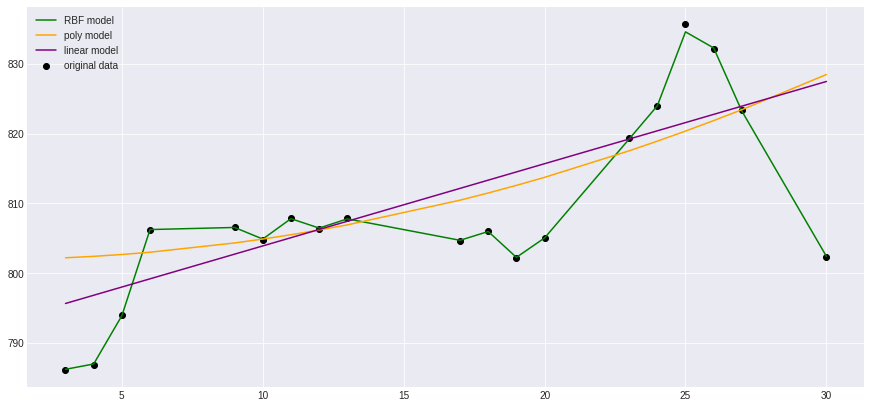

In [23]:
#Plot the models on a graph to see which has the best fit to the orignal data

plt.figure(figsize=(15,7))
plt.scatter(days,close_prices, color='black', label='original data')
plt.plot(days,rbf_svr.predict(days), color='green',label='RBF model' )
plt.plot(days,poly_svr.predict(days), color='orange',label='poly model' )
plt.plot(days,lin_svr.predict(days), color='purple',label='linear model' )
plt.legend()
plt.show()

In [28]:
#Show the predicted price for given day (for compare we consider the day we remove from secquence  1/31/2017)
day=[[31]]

print('The RBF SVR predict:',rbf_svr.predict(day))
print('The POLY SVR predict:',poly_svr.predict(day))
print('The LINEAR SVR predict:',lin_svr.predict(day))

#print the actual price
print('actual price:',actual_price['Close'][19]) #last row number

The RBF SVR predict: [795.52947609]
The POLY SVR predict: [830.24408491]
The LINEAR SVR predict: [828.62818182]
actual price: 796.79
